In [2]:
from astroquery.mast import Catalogs
from astropy.coordinates import SkyCoord
import astropy.units as u
import pandas as pd

coord = SkyCoord(ra=225.099, dec=-82.204, unit=(u.deg, u.deg), frame='icrs')

radius = 0.1 * u.deg
hsc_table = Catalogs.query_region(coordinates=coord, radius=radius, catalog="HSC")
df = hsc_table.to_pandas()

selected_columns = df[['MatchID', 'Distance', 'MatchRA', 'MatchDec', 'A_F606W', 'A_F606W_MAD', 
                            'A_F606W_N', 'A_F814W', 'A_F814W_MAD', 'A_F814W_N']]

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 10)

selected_columns

,MatchID,Distance,MatchRA,MatchDec,A_F606W,A_F606W_MAD,A_F606W_N,A_F814W,A_F814W_MAD,A_F814W_N
0,108074626,0.006606,225.098407,-82.203925,22.788000,0.003901,2,22.404200,0.0,1
1,50583674,0.006758,225.099366,-82.204101,23.738900,0.004399,2,23.225500,0.0,1
2,81888866,0.009525,225.098730,-82.204154,27.221300,0.000000,1,26.202900,0.0,1
3,91281537,0.011079,225.100286,-82.204060,22.985050,0.009350,2,22.589701,0.0,1
4,49763647,0.014601,225.097533,-82.203860,25.257350,0.039350,2,24.546101,0.0,1
...,...,...,...,...,...,...,...,...,...,...
49995,63082635,2.154803,224.853915,-82.217655,NaN,NaN,0,26.421600,0.0,1
49996,8366213,2.154814,225.160469,-82.238937,21.079901,0.000000,1,20.804001,0.0,1
49997,22246951,2.154900,225.105137,-82.239905,24.835700,0.039701,2,24.085501,0.0,1
49998,11894218,2.154954,225.046045,-82.239194,25.846499,0.021100,2,24.867599,0.0,1


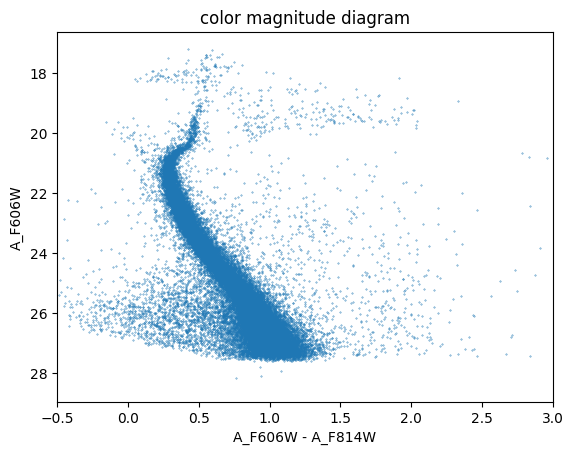

In [4]:
import matplotlib.pyplot as plt

df['F606W_F814W_color'] = selected_columns['A_F606W'] - selected_columns['A_F814W']

plt.scatter(df['F606W_F814W_color'], selected_columns['A_F606W'], s=0.1)

plt.xlabel('A_F606W - A_F814W')  
plt.ylabel('A_F606W')
plt.title('color magnitude diagram')

plt.gca().invert_yaxis()
plt.xlim(-0.5, 3.0)
plt.savefig("plot2")
plt.show()